# This notebook shows how to run the model using python API
***It depends on DNNDK v3.1***

## Import libraries

In [ ]:
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
from dnndk import n2cube, dputils
from ctypes import *
import cv2
import numpy as np
import os
import threading
import time
from matplotlib import pyplot as plt
import matplotlib

Error: Jupyter cannot be started. Error attempting to locate jupyter: Select an Interpreter to start Jupyter

## Build .so for python to use

In [2]:
!gcc -fPIC -shared dpu_e2e.elf -o libdpumodele2e.so
!sudo cp libdpumodele2e.so /usr/lib

## Load one image and do the preprocess

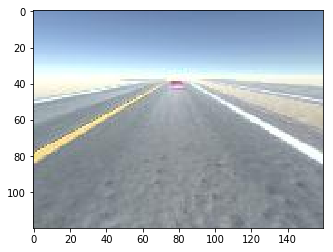

In [44]:
img_path = './images/images_00000000.jpg'
img = plt.imread(img_path)
plt.imshow(img)
img = cv2.imread(img_path)
img = img/255.0-0.5
#img = (img/255.0-0.5)*n2cube.dpuGetInputTensorScale(task,KERNEL_CONV_INPUT)

## Kernel Info

In [45]:
KERNEL_CONV = "e2e"
KERNEL_CONV_INPUT = "conv2d_1_convolution"
KERNEL_FC_OUTPUT = "dense_3_MatMul"

## Load the kernel

In [46]:
# Attach to DPU driver and prepare for runing
n2cube.dpuOpen()
# Create DPU Kernels for ResNet50
kernel = n2cube.dpuLoadKernel(KERNEL_CONV)
# Create DPU Tasks from DPU Kernel
task = n2cube.dpuCreateTask(kernel, 0)
# Get the output tensor channel from FC output
channel = n2cube.dpuGetOutputTensorChannel(task, KERNEL_FC_OUTPUT)

FCResult = [0 for i in range(channel)]

## Task Run

In [48]:
# Load image to DPU
dputils.dpuSetInputImage2(task, KERNEL_CONV_INPUT, img)
# Model run on DPU
n2cube.dpuRunTask(task)
# Get the output from FC output
n2cube.dpuGetOutputTensorInHWCFP32(task, KERNEL_FC_OUTPUT, FCResult, channel)
#n2cube.dpuGetOutputTensorScale(task,KERNEL_FC_OUTPUT)
# Get the label
print(FCResult*2 - 1.0)
#print(input_scale, output_scale)

[0.9921875, 0.9921875]
(128.0, 0.0078125)


In [43]:
rtn = n2cube.dpuDestroyKernel(kernel)
n2cube.dpuClose()

0